# Web

# 2022-05-06

------------------------------

## tomcat 스타트

-----------------------------

### 1.	server.xml 

```xml
	<Connecter 
		port="8088" : 클라이언트에서 웹서버로 접속하는 포트 
		
		// URIEcoding 속성은 개발자가 추가 한 것임 
		URIEncoding="UTF-8" : request (요청) 스트림에서 header에 들어오는(GET 방식) 문자중 일부를 UTF-8로 인코딩 하세요

	<Context docBase="testSpring" path="/testSpring"
```

### 2.	web.xml 

```xml
	<session-timeout>30</session-timeout>
	MIME Type
```


### 3.	context.xml	

```xml
	<Resource name="데이터소스이름: 형식은 : jdbc/SID이름"
		jdbc : JNDI 서비스의 JDBC를 연결하는 설정파일의 메타테이터 이름  
		jdbc/XXX : XXX <-- SID 이름 
		jdbc/XXX <-- 데이터 소스 이름 
		java:comp/env/jdbc <-- JNDI 서비스에서 JDBC 서비스를 하겠다는 메타테이터 이름 
		
		java:comp/env
		/jdbc
		/SID <-- 데이터 소스 
```

### 4.	Context/WEB-INF/web.xml 

```
	2번에 있는 web.xml :	web.xml 이 있는 해당 WAS 서버의 모든 컨텍스트에 적용되는 환경설정 파일 
	4번에 있는 web.xml :	web.xml 이 있는 해당 Context 에 만 적용되는 환경설정 파일 
		
		4.1		웰컴 파일 
		4.2		디스패처 서블릿 
		4.3		url-pattern
		4.4		spring-servlet.xml 스프링 프레임워크 환경 설정 파일 불러오기
		4.5		<session-timeout>30</session-timeout>
		4.6		한글 인코딩 : POST 방식으로 들어오는 스트림 UTF-8
		4.7		log4j.xml 불러오기 
```

### 5.	Context/WEB-INF/spring-servlet.xml 

```xml
		5.1		<mvc:annotation-driven />
				사용자 정의 콘트롤러를 찾고, 데이터(클라이언트에서 가져온)를 넘겨 주세요

		5.2		<context:component-scan base-package="a.b.c.com.**" /> 
				a.b.c.com 패키지 하위에 있는 패키지의 클래스 들 							
				@Controller
				사용자정의 콘트롤러 클래스 							
				@Service
				@Transactional 
				서비스 인터페이스, 서비스 구현체 클래스 
				@Repository
				다오 인터페이스, 다오 구현체 클래스를	
				메모리에 올리시오
		
		5.3		<property name="prefix" value="/WEB-INF/views/"/> 
				<property name="suffix" value=".jsp"/>
				컨트롤러에서 abc를 호출하면 /WEB-INF/views/abc.jsp 를 호출합니다
				머리말 꼬리말 지정
```

1 ~ 5번까지 알고 있어야 하는데 이것을 잘 몰라도 

```
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
===================================================
이클립스에서 tocmat 를  서버탭에서 스타트 해서 

1. tomcat 서버가 켜져야 한다. 
	해당 컨텍스트에 있는 컴포넌트(빈즈, 클래스)는 
	모두 메모리에 올라와 있어야 한다. 
	@Controller @Service @Transactional @Repository

2. 콘솔로그에서 url-pattern 을 확인해야 만 한다. 
====================================================
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
```


1. 이클립스에서 tocmat 를  서버탭에서 스타트 해서 

2. 콘솔로그에서 url-partten 을 확인해야 만 한다. 

```
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

INFO : 
org.springframework.web.servlet.mvc.method.annotation.RequestMappingHandlerMapping - 
Mapped "{[/spring_hello],methods=[],params=[],headers=[],consumes=[],produces=[],custom=[]}" 
onto public java.lang.String a.b.c.com.controller.HelloController.hello_spring(org.springframework.ui.Model)

/ <-- Context
spring_hello <-- url-pattern : 해당 컨텍스트에서 유니크 해야 한다. 
-> 
HelloController.hello_spring <-- 해당 하는함수에 url-pattern 을 찾아간다. 

INFO : 
org.springframework.web.servlet.mvc.method.annotation.RequestMappingHandlerMapping - 
Mapped "{[/spring_hello_get],methods=[],params=[],headers=[],consumes=[],produces=[],custom=[]}" 
onto public java.lang.String a.b.c.com.controller.HelloController.hello_spring_get(org.springframework.ui.Model)

/spring_hello_get
/ <-- Context
spring_hello_get <-- url-pattern : 해당 컨텍스트에서 유니크 해야 한다. 
HelloController.hello_spring_get <-- 해당 하는함수에 url-patter 을 찾아간다. 



$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
index.jsp : <a href="spring_hello.hbe">Hello 보기 </a>


1. <servlet-class>org.springframework.web.servlet.DispatcherServlet</servlet-class>

2. <mvc:annotation-driven />
3. <context:component-scan base-package="a.b.c.com.**" />

INFO : 
org.springframework.web.servlet.mvc.method.annotation.RequestMappingHandlerMapping - 
Mapped "{[/spring_hello],methods=[],params=[],headers=[],consumes=[],produces=[],custom=[]}" 
onto public java.lang.String a.b.c.com.controller.HelloController.hello_spring(org.springframework.ui.Model)


@Controller
public class HelloController

@RequestMapping(value="spring_hello")
public String hello_spring(Model model) {
	logger.info("HelloController.hello_spring() 함수 진입 >>> : ");
	
	model.addAttribute("msg", "Hello Spring !!!");
	logger.info("model >>> : " + model);
	
	return "spring_hello_return";
}

<property name="prefix" value="/WEB-INF/view/"/>
<property name="suffix" value=".jsp" />

Context/WebContent/WEB-INF/view/spring_hello_return.jsp
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


스프링 웹 엠브시 Spring Web MVC
------------------------------------

DispatcherServlet

HandlerMapping

Controller

ViewResolver

View
```

## Logger 찍어서 복사해서 확인해보기

> **Tomcat v8.5 Server at localhost 시작**


**✔ 전체 로그**

```
logger

INFO : org.springframework.web.servlet.DispatcherServlet - FrameworkServlet 'spring': initialization started

INFO : org.springframework.web.context.support.XmlWebApplicationContext - Refreshing WebApplicationContext for namespace 'spring-servlet': startup date [Fri May 06 12:49:35 KST 2022]; root of context hierarchy

INFO : org.springframework.beans.factory.xml.XmlBeanDefinitionReader - Loading XML bean definitions from ServletContext resource [/WEB-INF/spring-servlet.xml]
INFO : org.springframework.beans.factory.support.DefaultListableBeanFactory - Pre-instantiating singletons in org.springframework.beans.factory.support.DefaultListableBeanFactory@20433b85: defining beans 

[mvcContentNegotiationManager,org.springframework.web.servlet.mvc.method.annotation.RequestMappingHandlerMapping#0,org.springframework.format.support.FormattingConversionServiceFactoryBean#0,org.springframework.web.servlet.mvc.method.annotation.RequestMappingHandlerAdapter#0,org.springframework.web.servlet.handler.MappedInterceptor#0,org.springframework.web.servlet.mvc.method.annotation.ExceptionHandlerExceptionResolver#0,org.springframework.web.servlet.mvc.annotation.ResponseStatusExceptionResolver#0,org.springframework.web.servlet.mvc.support.DefaultHandlerExceptionResolver#0,org.springframework.web.servlet.handler.BeanNameUrlHandlerMapping,org.springframework.web.servlet.mvc.HttpRequestHandlerAdapter,org.springframework.web.servlet.mvc.SimpleControllerHandlerAdapter,helloController,org.springframework.context.annotation.internalConfigurationAnnotationProcessor,org.springframework.context.annotation.internalAutowiredAnnotationProcessor,org.springframework.context.annotation.internalRequiredAnnotationProcessor,org.springframework.context.annotation.internalCommonAnnotationProcessor,org.springframework.web.servlet.view.UrlBasedViewResolver#0,org.springframework.context.annotation.ConfigurationClassPostProcessor.importAwareProcessor]; root of factory hierarchy


INFO : org.springframework.web.servlet.mvc.method.annotation.RequestMappingHandlerMapping - Mapped "{[/hello_kimstar],methods=[],params=[],headers=[],consumes=[],produces=[],custom=[]}" onto public java.lang.String a.b.c.com.controller.HelloController.HelloKimStar(org.springframework.ui.Model)
INFO : org.springframework.web.servlet.DispatcherServlet - FrameworkServlet 'spring': initialization completed in 1824 ms
```

**✔ 확인해야 할 로그**

```
INFO : org.springframework.web.servlet.mvc.method.annotation.RequestMappingHandlerMapping - Mapped "{[/hello_kimstar],methods=[],params=[],headers=[],consumes=[],produces=[],custom=[]}" onto public java.lang.String a.b.c.com.controller.HelloController.HelloKimStar(org.springframework.ui.Model)
INFO : org.springframework.web.servlet.DispatcherServlet - FrameworkServlet 'spring': initialization completed in 1824 ms
```

중에서

```
org.springframework.web.servlet.mvc.method.annotation.RequestMappingHandlerMapping - Mapped "{[/hello_kimstar],
```

여기에 Mapped에 /hello_kimstar가 있는지 확인해야 한다.




> **index.jsp 화면에 출력 시키기**



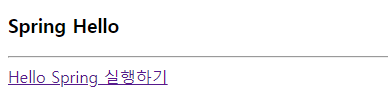

> **Hello Spring 실행하기 버튼 클릭 시켜서 WEB-ING 폴더 안에 view 폴더 안에 hello_spring_return.jsp 내용 출력시키기**

```
logger

INFO : a.b.c.com.controller.HelloController - HelloController :: HelloKimStar 함수 진입 >>> : 
INFO : a.b.c.com.controller.HelloController - model >>>> : {kimStar=Kim Byeol is Universe Star!!!}
INFO : org.apache.jsp.WEB_002dINF.view.hello_005fspring_005freturnjsp_jsp - hello_spring_return.jsp 페이지 시작 ~!!
INFO : org.apache.jsp.WEB_002dINF.view.hello_005fspring_005freturnjsp_jsp - kimStar >>> : Kim Byeol is Universe Star!!!
```


> **화면 출력 결과**

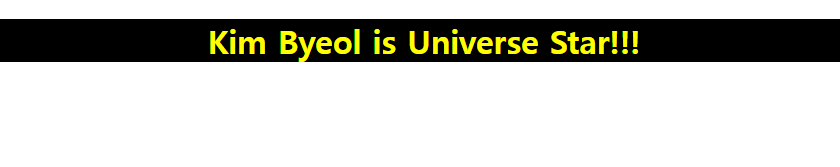

## Handler Mapping

Front Controller(Dispatcher Servlet)이 HandlerMapping에게 콘트롤러를 찾으라고 시키면,
 
xml에 세팅해 놓은 것(url-pattern태그 등등)을 보고 콘트롤러를 찾아간다. 

프론트 콘트롤러가 찾아가는 순서




```
index.jsp의 anchor Tag

=> servlet-class 태그의 DispatcherServlte

=> mvc:annotation-driven

=> context태그의 base-package

=> INFO : 에 RequestMappingHandlerMapping-Mapped 뒤에 "{/찾아갈 RequestMapping 어노테이션의 value}" 

```

## 스프링 웹 MVC

- Spring3.pdf  p.75

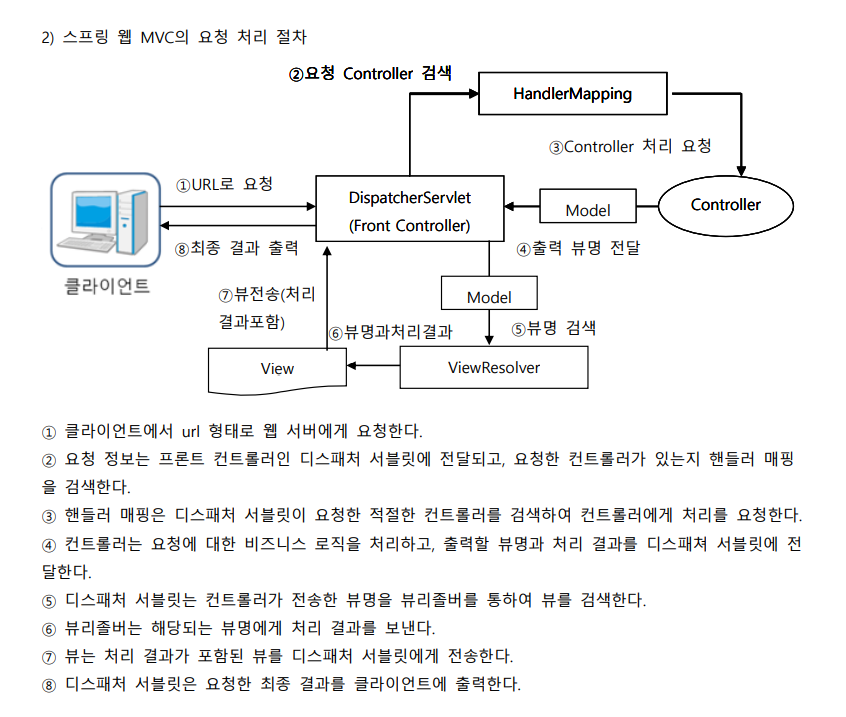

## 컨트롤러의 반환 타입

> **Model은 리턴하는 데이터(java를 예를 들면 ArrayList)**

> **View는 리턴할 데이터 변환 (리턴페이지 이름)**

